# Henrique Hundsdorfer Vedoveli

Para realizar a análise foi utilizado o dataset do [MovieLens](https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv).

Primeiramente foi realizado a limpeza dos dados para que fosse possível a realização de qualquer análise. Após foram plotados gráficos como histogramas e boxplots para realizar algumas análises visuais. Também foram realizados testes paramétricos e não paramétricos para auxiliar a respostas de algumas qustões.

Por fim foi realizada a análise de algumas das franquias mais famosas do cinema e quais os filmes melhores e piores classificados.

Abaixo está como cada passo foi realizado mais detalhadamente.

---


###**Data cleaning**
> Utilizando o Dataset importado foi possível perceber que existem 18 filmes sem notas médias que foram retirados pois não fazia sentido continuar com esses dados.

> Foram retirados também do Dataset os filmes com menos de 50 votos, sendo assim o filme com mais votos tem 329 votos e com menos 50 votos respectivamente. 

--- 

###**Análise do histograma do total de votos e nota média**
> Analisando o histograma com o total de votos é possivel analisar que o histograma começa com 50 votos, e a total máximo de votos é 329, olhando o gráfico é possivel ver que existem vários filmes com poucos votos e poucos filmes com muitos votos, caracterizando um gráfico assimétrico a direita. O mesmo ocorre para o gráfico cumulativo, não ocorre nenhuma anomalia, com pouco crescimento para muitos votos.

>Para o histograma de notas médias a distribuição de notas é parecida com uma distribuição normal, apesar de não ter realizado nenhum teste estatístico ainda. O gráfico cumulativo não tem nenhuma anormalidade seguindo uma distribuição regular. Além disso foi possível concluir que apenas 20% dos filmes tem notas maior que 3.99.

---

###**Gêneros com mais e menos filmes**
> Ao analizar os gêneros dos filmes foi possível concluir que os cinco gêneros com mais filmes são: Comedy com 181 filmes, Drama com 166 filmes, Action com 164 filmes, Adventure com 132 filmes e Thriller com 121 filmes. E os gêneros que menos contêm filmes são Western, FilmNoir e Documentary.

---

###**Média de votos por filmes**
> Observando o DataFrame com a média dos votos que cada gênero recebeu por filme podemos ver que o gênero com mais números de votos por filmes é o gênero War com uma média 111.2 votos. Os gêneros seguintes seguem quase a mesma média, variando entre 99 e 84, os três últimos gêneros apresentam um valor discrepante, sendo eles Western (75.0), FilmNoir (72.8), Documentary (54.0).

---

###**Filmes mais assistidos dos gêneros mais assistidos**
> Os dois gêneros mais assistidos são: Action e Drama (a análise foi feita com base no número de votos). Os filmes com maior nota média dentre os gêneros são:

- **Action**  

|Titúlo| Média de Votos|
|------|-------------:|
|Fight Club|4.27|
|The Dark Knight|4.24|
|The Princess Bride|4.23|
|Star War: Episode IV -  A New Hope|4.23|
|Star Wars: Episode V - The Empire Strikes Back|4.22|


- **Drama**

|Titúlo| Média de Votos|
|------|-------------:|
|The Shawshank Redemption|4.43|
|The Godfather|4.29|
| Fight Club|4.27|
|Cool Hand Luke|4.27|
|The Godfather: Part II|4.26|


---

###**Sugestão para escolha entre Adventure ou Horror**
> Minha sugestão as três questões levantadas sobre qual gênero seria melhor fazer um filme, para as três minha resposta é que o genêro Adventure seria o melhor. Devido a diversos fatores explicados.

---

###**Análise genêro Animation**
> Utilizando os gráficos gerados foi possível concluir que a medida que os anos aumentam a nota média e o total de votos que os filmes do genêro recebe aumenta também, apesar da correlação ser baixa.

---

### **Filmes com as maiores notas médias**

> Para todo o dataset os filmes com maiores notas médias em todos os genêros são: The Shawshank Redemption, The Godfather, Fight Club, Cool Hand Luke e Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb

> E com as menores notas médias são: Johnny Mnemonic, Judge Dredd, 	City Slickers II: The Legend of Curly's Gold , Coneheads e 	Wild Wild West (1999)

> Os gêneros que mais aparecem nos melhores filmes são: Drama e Crime. Os gêneros que mais aparecem nos piores filmes são: SciFi, Comedy e Action.

---

### Franquias

> Para as franquias foi possível perceber que o segundo filme tende a receber notas menores que o primeiro. Porém algumas franquias como Toy Story, The Lord of the Rings e Harry coneguiram aumentar as notas novamente, o que não aconteceu com Star Wars e Back to the Future.


## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt


print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.3
Usando seaborn 0.10.0
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [2]:
# solução
url_filmes = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv'

filmes = pd.read_csv(url_filmes)
filmes.rename(columns={'movieId':'filmeId',
                      'title':'titulo',
                      'genres':'generos'}, inplace=True) 
filmes.set_index('filmeId', inplace=True)

filmes.head(3)

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [3]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [4]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head(3)

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [5]:
# solução
url_notas = 'https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv'

notas = pd.read_csv(url_notas)

notas.rename(columns={'userId':'usuarioId',
                      'movieId':'filmeId',
                      'rating':'nota',
                      'timestamp':'momento'}, inplace=True) 

notas.head(3)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [6]:
# criando a coluna nota_media no dataframe filmes
grupo = notas.groupby('filmeId')
filmes['nota_media'] = grupo['nota'].mean()

filmes.head(3)

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615


## Limpeza do Dataset

In [7]:
# É possivel observar que existem 18 filmes sem notas médias
print('Existem {} filmes sem notas médias.'.format(filmes['nota_media'].isnull().sum()))

Existem 18 filmes sem notas médias.


In [8]:
# Retirando os filmes sem nota média 
filmes = filmes.query('nota_media > 0')
print('Existem {} filmes sem notas médias.'.format(filmes['nota_media'].isnull().sum()))

Existem 0 filmes sem notas médias.


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [9]:
notas.head(3)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [0]:
# solução para calcular o total de votos por filme
total_votos_por_filmes = []
for i,_ in grupo:
  total_votos_por_filmes.append(len(grupo.groups[i]))

In [11]:
len(filmes) == len(total_votos_por_filmes)

True

In [0]:
# solução para criar a nova coluna e filtrar os filmes
#criação da nova coluna
filmes['total_de_votos'] = total_votos_por_filmes
# filtrando com 50 ou mais votos
selecao = filmes['total_de_votos'] >= 50
filmes = filmes[selecao]


In [13]:
# o máximo de votos que um filme recebeu e o minimo (depois do filtro)
filmes.total_de_votos.max(), filmes.total_de_votos.min()

(329, 50)

In [14]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 1.0, 'Média de votos')

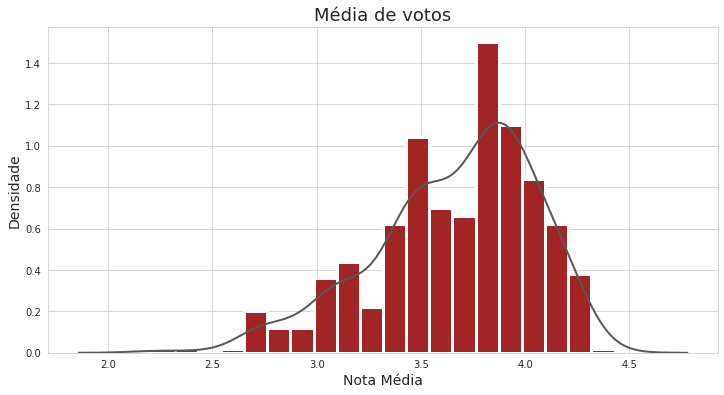

In [15]:
# solução histograma

# setando o estilo para os plots com seaborn
sns.set_style('whitegrid')

# -- GRAFICO --
ax = sns.distplot(filmes['nota_media'].values, bins = 20, kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Nota Média', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_title('Média de votos', fontsize = 18)



In [16]:
print('A nota média máxima do dataset -- {}'.format(filmes['nota_media'].round(2).max()))
print('A nota média mínima do dataset -- {}'.format(filmes['nota_media'].round(2).min()))

A nota média máxima do dataset -- 4.43
A nota média mínima do dataset -- 2.21


Text(0.5, 1.0, 'Média de votos')

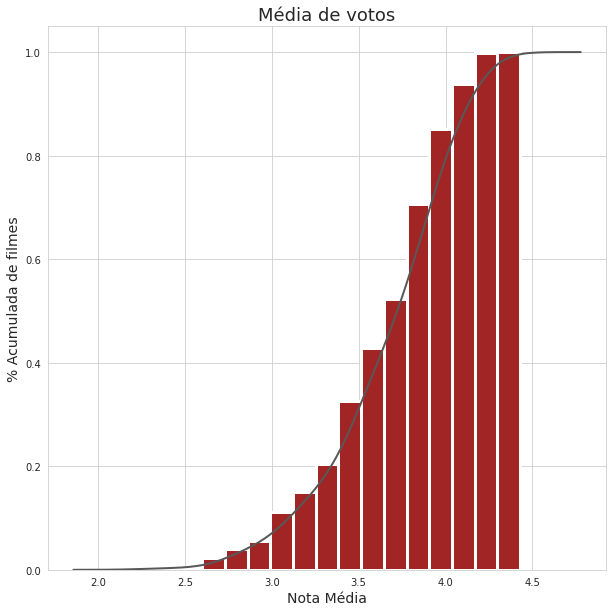

In [17]:
# solução cumulativa
# -- GRAFICO -- 
ax = sns.distplot(filmes['nota_media'].values, kde_kws={"color": "#585858", "lw": 2, 'cumulative':True},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525", 'cumulative':True})

# -- LEGENDA --
ax.figure.set_size_inches(10, 10)
ax.set_xlabel('Nota Média', fontsize = 14)
ax.set_ylabel('% Acumulada de filmes', fontsize = 14)
ax.set_title('Média de votos', fontsize = 18)

## Análise Gráfica

- Histograma: Fazendo a análise gráfica podemos observar que o gráfico inicia na nota média de 2.21 e termina na nota média 4.43. Tendo poucos votos para as notas médias baixas (2.0 a 3.0) as maiores notas estão entre o intervalo de 3.5 e 4.0.

- Histograma Cumulativo: acima é possivel concluir que a média acumulada dos votos em maior parte segue um padrão regular. 

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 1.0, 'Histograma do Total de votos')

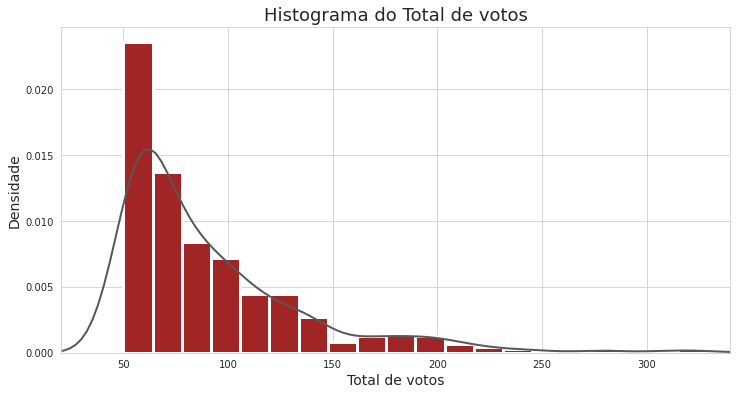

In [18]:
# solução histograma
# -- GRAFICO --
ax = sns.distplot(filmes['total_de_votos'], bins = 20, kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.set_xlim(20,340)
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Total de votos', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_title('Histograma do Total de votos', fontsize = 18)

In [19]:
print('O máximo de votos do dataset -- {}'.format(filmes['total_de_votos'].max()))
print('O minímo de votos do dataset -- {}'.format(filmes['total_de_votos'].min()))


O máximo de votos do dataset -- 329
O minímo de votos do dataset -- 50


Text(0.5, 1.0, 'Total de Votos Acumulado')

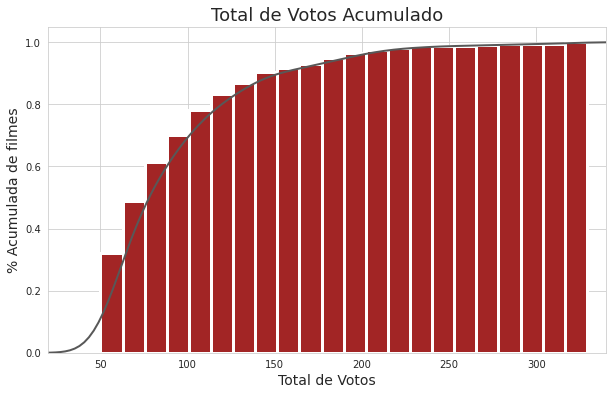

In [20]:
# solução cumulativa
# -- GRAFICO -- 
ax = sns.distplot(filmes['total_de_votos'], kde_kws={"color": "#585858", "lw": 2, 'cumulative':True},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525", 'cumulative':True})

# -- LEGENDA -- 
ax.set_xlim(20,340)
ax.figure.set_size_inches(10, 6)
ax.set_xlabel('Total de Votos', fontsize = 14)
ax.set_ylabel('% Acumulada de filmes', fontsize = 14)
ax.set_title('Total de Votos Acumulado', fontsize = 18)

## Análise Gráfica 

- Histograma: Analisando o histograma é possivel concluir que a maioria dos filmes recebe menos votos, no caso 50, e poucos filmes receberam muitos votos. O gráfico apresenta uma quebra de padrão depois dos 150 e volta ao normal após o 200.

- Histograma CDF: Analisando o CDF acima é possivel concluir que os dados não contém nenhuma anormalia

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
valor = filmes['nota_media']
nota_limite_dos_20_porcento = valor.quantile(0.80)

# apenas 20 % dos filmes tem notas acima de 3.99.

In [22]:
print("20% dos filmes tem nota maior que de {:.2f}".format(nota_limite_dos_20_porcento))

20% dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [23]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [24]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [25]:
# solução
lista_de_generos = []
for i in generos:
  lista_de_generos.append([generos[i].sum(), i])
lista_de_generos

[[164, 'Action'],
 [132, 'Adventure'],
 [32, 'Animation'],
 [47, 'Children'],
 [181, 'Comedy'],
 [87, 'Crime'],
 [2, 'Documentary'],
 [166, 'Drama'],
 [66, 'Fantasy'],
 [4, 'FilmNoir'],
 [26, 'Horror'],
 [28, 'IMAX'],
 [21, 'Musical'],
 [38, 'Mystery'],
 [85, 'Romance'],
 [92, 'SciFi'],
 [121, 'Thriller'],
 [19, 'War'],
 [12, 'Western']]

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [26]:
# solução
# Lista ordenada em forma crescente do gênero com mais filme para com menos
top_generos_em_quantidade_de_filmes = sorted(lista_de_generos, reverse = True)

ordenado , total_votos = [], []
for i in top_generos_em_quantidade_de_filmes:
    index = i[0]
    genero = i[1]
    ordenado.append([genero, index])
    total_votos.append(index)


ordenado

[['Comedy', 181],
 ['Drama', 166],
 ['Action', 164],
 ['Adventure', 132],
 ['Thriller', 121],
 ['SciFi', 92],
 ['Crime', 87],
 ['Romance', 85],
 ['Fantasy', 66],
 ['Children', 47],
 ['Mystery', 38],
 ['Animation', 32],
 ['IMAX', 28],
 ['Horror', 26],
 ['Musical', 21],
 ['War', 19],
 ['Western', 12],
 ['FilmNoir', 4],
 ['Documentary', 2]]

In [27]:
print('Os cinco gêneros com mais filmes são:', ordenado[:5])

Os cinco gêneros com mais filmes são: [['Comedy', 181], ['Drama', 166], ['Action', 164], ['Adventure', 132], ['Thriller', 121]]


In [28]:
from numpy import ravel

# ordenando o DataFrame generos do genero com mais filme (esquerda), para com menos filme (direita)
# o nome do nome DataFrame ordenado é generos_ordenada

lista_ordenada_generos = np.ravel(ordenado)[:-1:2]

generos_ordenada = generos[lista_ordenada_generos]
generos_ordenada.head()


,Comedy,Drama,Action,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,Musical,War,Western,FilmNoir,Documentary
filmeId,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
total_generos = pd.DataFrame(ordenado)
total_generos.rename(columns={0:'Gêneros',
                      1:'Total de Filmes'}, inplace=True) 

total_generos

,Gêneros,Total de Filmes
0,Comedy,181
1,Drama,166
2,Action,164
3,Adventure,132
4,Thriller,121
5,SciFi,92
6,Crime,87
7,Romance,85
8,Fantasy,66
9,Children,47


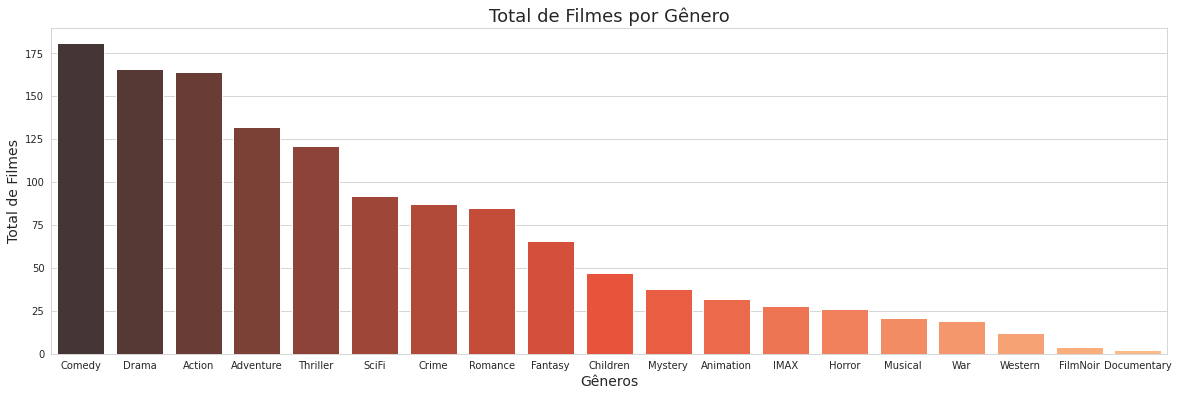

In [30]:
# visualização do total de filmes que cada gênero contem 

# -- GRAFICO -- 
ax = sns.barplot(x = 'Gêneros', y = 'Total de Filmes', data = total_generos,
                 palette = 'OrRd_d', saturation = 1)

# -- LEGENDA --
ax.set_title('Total de Filmes por Gênero', fontsize = 18)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize = 14)
ax.set_ylabel('Total de Filmes', fontsize = 14)
ax

## Análise Gráfica

- Gráfico de Barras: Realizando a análise do gráfico de barras 'Total de Filmes por Gênero' é possível concluir que o Gênero Comedy é o gênero que mais contêm filmes, seguido por Drama e Action. Os gêneros que menos contêm filmes são Western, FilmNoir e Documentary.

## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [31]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0,215,215,215,215,0,0,0,215,0,0,0,0,0,0,0,0,0,0
1,0,110,0,110,0,0,0,0,110,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0
3,102,0,0,0,0,102,0,0,0,0,0,0,0,0,0,0,102,0,0
4,0,0,0,0,54,0,0,0,0,0,0,0,0,0,54,0,0,0,0


In [32]:
# solução 
## a lista votos contém o numero de votos que cada gênero recebeu e o do gênero
votos = []

for i in votos_por_genero_por_filme:
  votos.append([votos_por_genero_por_filme[i].sum() , i])
votos = sorted(votos, reverse = True)

votos

[[15734, 'Action'],
 [15445, 'Drama'],
 [15330, 'Comedy'],
 [13117, 'Adventure'],
 [11907, 'Thriller'],
 [8989, 'SciFi'],
 [8649, 'Crime'],
 [7444, 'Romance'],
 [5993, 'Fantasy'],
 [4331, 'Children'],
 [3452, 'Mystery'],
 [3066, 'Animation'],
 [2492, 'IMAX'],
 [2215, 'Horror'],
 [2113, 'War'],
 [1822, 'Musical'],
 [900, 'Western'],
 [291, 'FilmNoir'],
 [108, 'Documentary']]

In [33]:
# cria um DataFrame com colunas ordenadas da esquerda (mais filmes) para a direita (menos filmes)
lista_ordenada_1 = np.ravel(votos)[:-1:2]

lista_ordenada_1_int =[]

[lista_ordenada_1_int.append(int(i)) for i in lista_ordenada_1]

lista_ordenada_2 = np.ravel(votos)[1::2]

df_votos = pd.DataFrame([lista_ordenada_1_int], columns=lista_ordenada_2)
df_votos

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
0,15734,15445,15330,13117,11907,8989,8649,7444,5993,4331,3452,3066,2492,2215,2113,1822,900,291,108


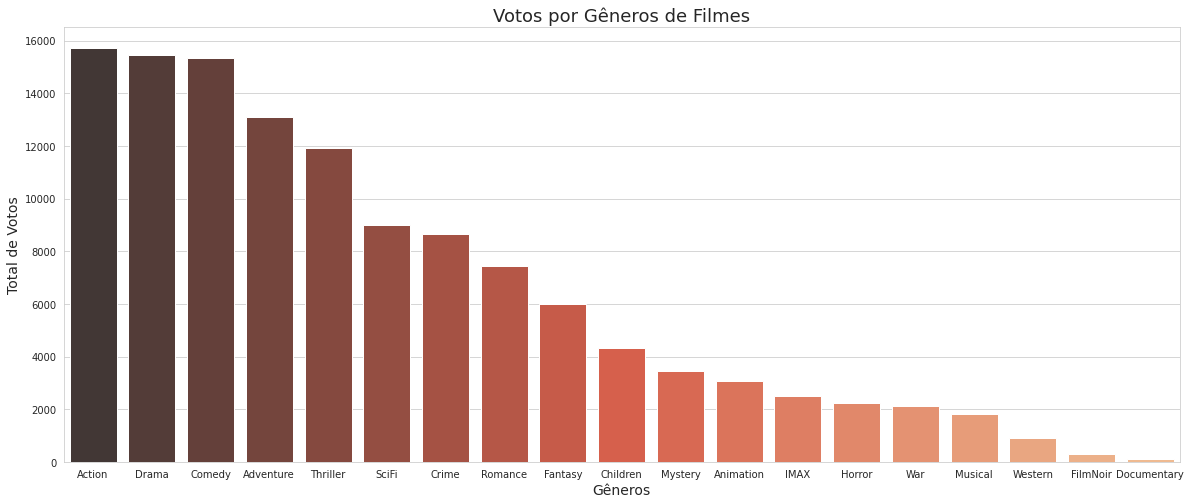

In [34]:
# solução
# -- GRAFICO -- 
ax = sns.barplot(data = df_votos, palette="OrRd_d", saturation= 0.8)
ax.set_title('Votos por Gêneros de Filmes', fontsize = 18)

# -- LEGENDA --
ax.figure.set_size_inches(20, 8)
ax.set_xlabel('Gêneros', fontsize = 14)
ax.set_ylabel('Total de Votos', fontsize = 14)
ax

## Análise Gráfica

- Gráfico de Barras: Observando o gráfico 'Votos por Gêneros de Filmes' podemos observar que os gêneros Action, Drama e Comedy são os gêneros com mais votos por gêneros que estão bem próximos os números de votos.

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [0]:
# solucao código
# criação das listas lista_filmes e votos, que contem o total de filmes de cada genero
# e o total de generos de cada generos.
lista_filmes, votos = [], []
for i in df_votos:
  lista_filmes.append(generos_ordenada.sum()[i])
  votos.append(df_votos[i][0])

In [0]:
# solucao código (continuação)
# criação da lista votos_por_filme que contem os votos por filmes de cada generos
# a ordem dos generos é a ordem do DF generos
index, votos_por_filme = 0, []
while index <= 18:
  votos_por_filme.append(((votos[index] / lista_filmes[index]).round(1)))
  index = index + 1

In [37]:
# solucao código (continuação)
# criação de um DataFrame com os votos medios que cada filme recebeu por gênero
# o nome do DF é votos_por_filme_generos
votos_por_filme_generos = {'Filmes':['Action','Drama','Comedy','Adventure','Thriller','SciFi','Crime','Romance','Fantasy','Children','Mystery','Animation','IMAX','Horror','War','Musical','Western','FilmNoir','Documentary'],
 'Votos por Filme': votos_por_filme}
votos_por_filme_generos = pd.DataFrame(votos_por_filme_generos)

# organizando o dataframe em ordem crescente
votos_por_filme_generos_ordenada = votos_por_filme_generos.sort_values(by = 'Votos por Filme', ascending= False)
votos_por_filme_generos_ordenada.index = range(0,len(votos_por_filme_generos_ordenada))
votos_por_filme_generos_ordenada

,Filmes,Votos por Filme
0,War,111.2
1,Adventure,99.4
2,Crime,99.4
3,Thriller,98.4
4,SciFi,97.7
5,Action,95.9
6,Animation,95.8
7,Drama,93.0
8,Children,92.1
9,Fantasy,90.8


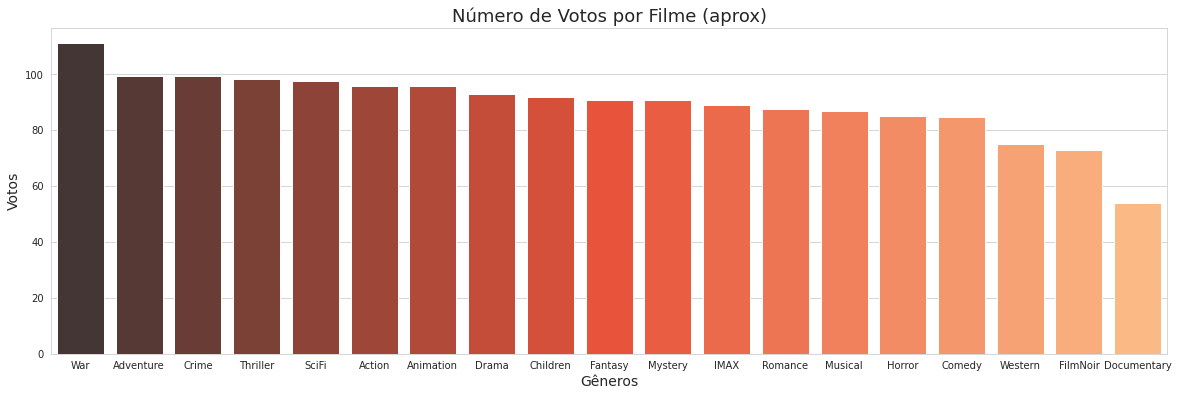

In [38]:
# solução com visualização 
# -- GRAFICO -- 
ax = sns.barplot(x = 'Filmes', y = 'Votos por Filme',  data = votos_por_filme_generos_ordenada, palette="OrRd_d", saturation=1 ,)

# -- LEGENDAS --
ax.set_title('Número de Votos por Filme (aprox)', fontsize = 18)
ax.figure.set_size_inches(20, 6)
ax.set_xlabel('Gêneros', fontsize = 14)
ax.set_ylabel('Votos', fontsize = 14)
ax

## Análise Gráfica

 - Gráfico de Barras: Observando o gráfico de barras 'Número de Votos por Filme' é possível concluir que o gênero com mais números de votos por filmes é o gênero War com uma média de 111.2 votos por filmes. Os gêneros seguintes seguem quase a mesma média, variando entre 99 e 84, os três últimos gêneros apresentam um valor discrepante, sendo eles Western - 75.0, FilmNoir - 72.8, Documentary -	54.0

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    

O gênero Action é o terceiro gênero com mais filmes produzidos, são ao todo 164 filmes produzidos e esse pode ser um dos motivos pelo qual o gênero que mais contém contém votos (15734 votos). Por ter muitos filmes acaba tendo muitos votos.

Já o gênero War contém 19 filmes e 2113 votos, porém quando dividimos o número de votos por filmes, temos que cada filme tem em média 111.2 votos, sendo o gênero com mais votos por filmes.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0.5, 0, 'Total de Votos')

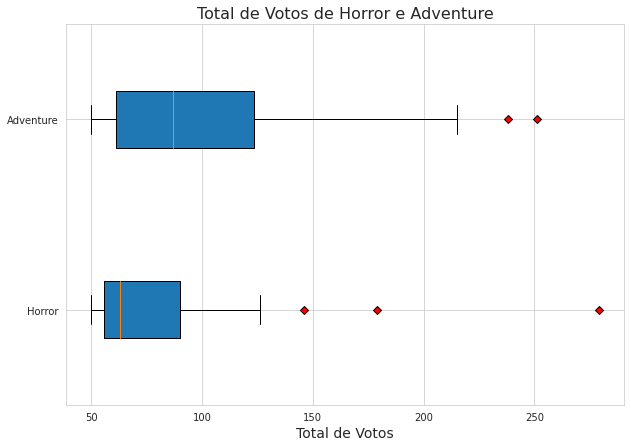

In [39]:
# solução:
filmes_adventure = filmes.query('Adventure == True')['total_de_votos']
filmes_horror = filmes.query('Horror == True')['total_de_votos']

# -- GRAFICO --
plt.figure(figsize=(10,7))
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot([filmes_horror, filmes_adventure], labels = ['Horror', 'Adventure'],
            patch_artist=True, flierprops=red_diamond,vert=False,widths=.3)

# -- LEGENDA --
plt.title("Total de Votos de Horror e Adventure", fontsize = 16)
plt.xlabel('Total de Votos',fontdict={'fontsize':14})

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text major ticklabel objects>)

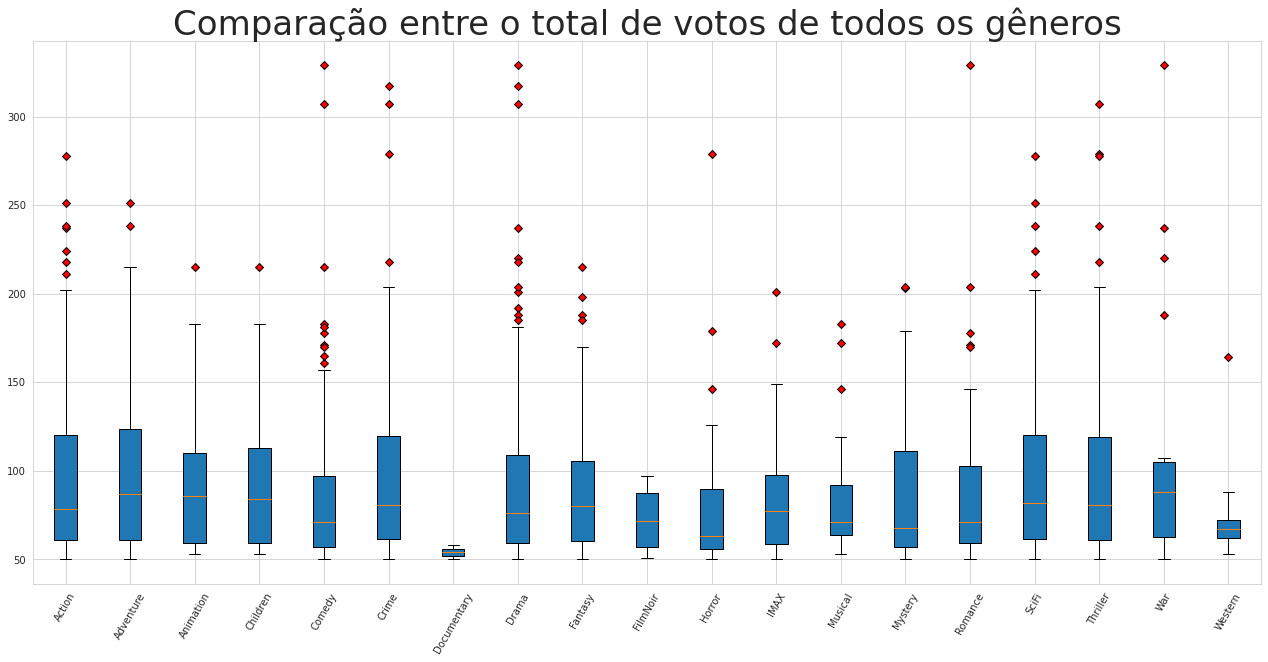

In [40]:
boxplot = []
for i in generos.columns:
  boxplot.append(filmes.query(i+' == True')['total_de_votos'])

plt.figure(figsize=(22,10))
plt.boxplot(boxplot, labels = generos.columns,
              patch_artist=True,flierprops=red_diamond,widths=.35)
plt.title('Comparação entre o total de votos de todos os gêneros', fontdict={'fontsize':34})
plt.xticks(rotation = 60)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

In [41]:
total_de_votos_adventure = votos_por_filme_generos_ordenada.query('Filmes == "Adventure"')

total_de_votos_horror = votos_por_filme_generos_ordenada.query('Filmes == "Horror"')

total_de_votos_adventure.set_index('Filmes', inplace=True)
total_de_votos_horror.set_index('Filmes',inplace=True)

adv_hor = total_de_votos_adventure.append(total_de_votos_horror)
adv_hor
# result = df1.append(df2)

,Votos por Filme
Filmes,
Adventure,99.4
Horror,85.2


### Recomendação de genêro

> Utilizando os boxplots e a tabela acima é possível visualizar os quartis e outliers de ambos os genêros. Utilizando como meta maior faturamento, minha recomendação é o genêro Adventure, tendo em vista que sua mediana e seus quartis são maiores que de Horror, sendo assim tendo maior chance de ter uma renda maior. 

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

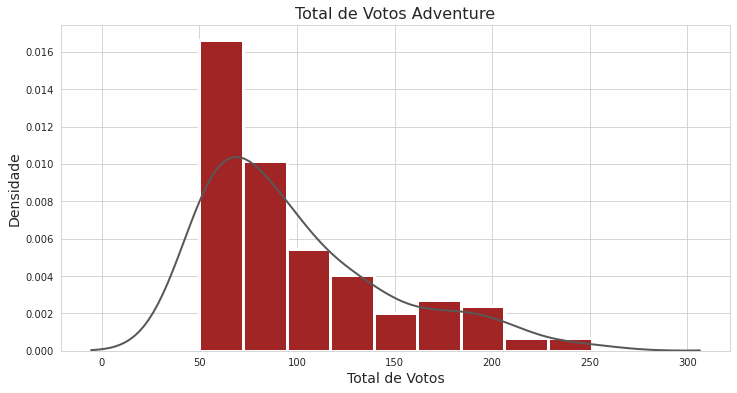

In [42]:
# solucao histograma de aventura
# -- GRAFICO -- 
ax = sns.distplot(filmes_adventure,kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12,6)
ax.set_title('Total de Votos Adventure', fontsize = 16)
ax.set_xlabel('Total de Votos',fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax

Text(0, 0.5, 'Densidade')

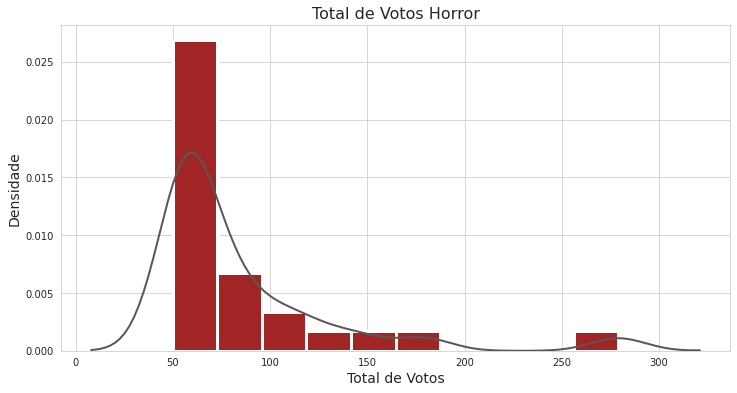

In [43]:
# solucao histograma de horror
# -- GRAFICO -- 
ax = sns.distplot(filmes_horror, kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA --
ax.figure.set_size_inches(12,6)
ax.set_title('Total de Votos Horror', fontsize = 16)
ax.set_xlabel('Total de Votos',fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)

In [44]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

from scipy.stats import normaltest, ranksums

_, p_value = normaltest(filmes_adventure)
print('O p-value para o gênero Adventure é {}'.format(p_value))

_, p_value = normaltest(filmes_horror)
print('O p-value para o gênero Horror é {}'.format(p_value))



O p-value para o gênero Adventure é 5.987863006199139e-06
O p-value para o gênero Horror é 1.2786148884334685e-07


In [45]:
_,p_value = ranksums(filmes_horror, filmes_adventure)
print('p_value utilizando o teste não-parâmetrico runksums: ', p_value)

p_value utilizando o teste não-parâmetrico runksums:  0.04782366231999856


> Após realizar o plot do histograma, o teste de normalidade e o teste não-parâmetrico, minha sugestão continua a mesma, o melhor genêro é Adventure.

> Ao observar o histograma do Adventure percebemos que apesar de exister muitos filmes com o total de votos igual a 50 (que é o mínimo possível no dataset)  esse número cai devagar, isso significa que também existem mais filmes com notas maiores.

> Quando observamos o histograma do Horror percebemos que existem muitos filmes com total de votos igual a 50 e esse número cai rapidamente, sendo assim existem poucos filmes com notas maiores.

> Ao realizar os testes paramétrico e não paramétrico, percebemos que no teste paramétrico obtivemos um p-value menor que 0.05, descartando assim a hipótese nula que as amostram venham de uma distribuição normal. Para o teste não paramétrico (ranksums) obtivemos um p-value também inferior a 0.05, isso indica que a uma amostra possui valores menores que a outra.



## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0, 0.5, 'Notas Médias')

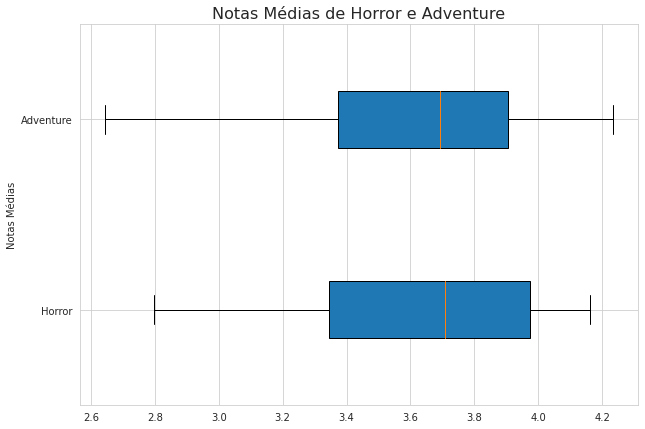

In [46]:
# solução

filmes_adventure_mean = filmes.query('Adventure == True')['nota_media']
filmes_horror_mean = filmes.query('Horror == True')['nota_media']

# -- GRAFICO --
plt.figure(figsize=(10,7))
plt.boxplot([filmes_horror_mean, filmes_adventure_mean], labels = ['Horror', 'Adventure'],
            patch_artist=True, vert=False, widths=.3)

# -- LEGENDA --
plt.title("Notas Médias de Horror e Adventure", fontsize = 16)
plt.ylabel('Notas Médias')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

>Os dois gêneros apresentam a mediana muito próximas para as notas médias, o gênero Adventure tem mais votos que Horror como gênero e os filmes de Adventure geralmente também tem mais votos que Horror.

>O melhor gênero a se escolher seria Adventure, pois possue as maiores notas médias.




## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

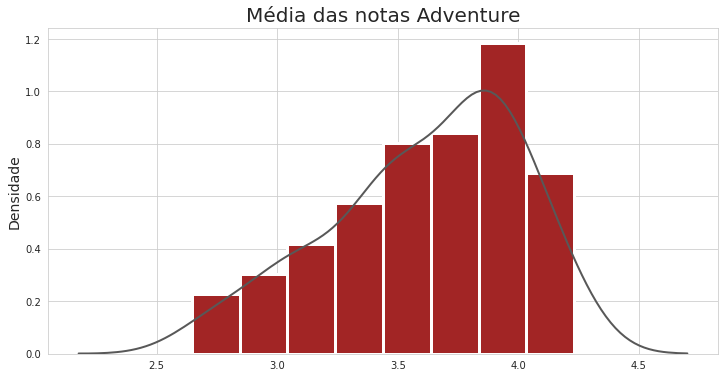

In [47]:
# solucao histograma de aventura
# -- GRAFICO -- 
ax = sns.distplot(filmes_adventure_mean,kde_kws={"color": "#585858", "lw": 2},
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12,6)
ax.set_title('Média das notas Adventure', fontsize = 20)
ax.set_xlabel(' ')
ax.set_ylabel('Densidade', fontsize = 14)
ax


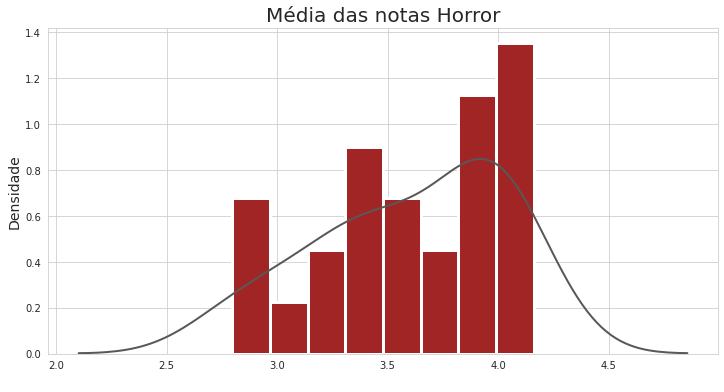

In [48]:
# solucao histograma de aventura
# -- GRAFICO -- 
ax = sns.distplot(filmes_horror_mean,kde_kws={"color": "#585858", "lw": 2},bins=8,
                  hist_kws={"histtype": "bar", "linewidth": 3, "alpha": 1, "color": "#A22525"})

# -- LEGENDA -- 
ax.figure.set_size_inches(12,6)
ax.set_title('Média das notas Horror', fontsize = 20)
ax.set_xlabel(' ')
ax.set_ylabel('Densidade', fontsize = 14)
ax

In [49]:
_, p_value = normaltest(filmes_adventure_mean)
print('O p-value para o gênero Adventure é {}'.format(p_value))

_, p_value = normaltest(filmes_horror_mean)
print('O p-value para o gênero Horror é {}'.format(p_value))


O p-value para o gênero Adventure é 0.012835697582553224
O p-value para o gênero Horror é 0.21186284682483916


In [50]:
_, p_value = ranksums(filmes_adventure_mean,filmes_horror_mean)
p_value

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



> Sim, observando os histogramas é possível concluir que o gênero Adventure possui maiores notas médias alcançadas. E a maior nota media alcançada por Horror não chega a 4.2 enquanto Adventure passa dessa nota média.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

In [0]:
# análise adventure
media_votos_adventure = filmes_adventure.mean()
media_notas_adventure = filmes.query('Adventure == True')['nota_media'].mean()

mediana_votos_adventure = filmes_adventure.median()
mediana_notas_adventure = filmes.query('Adventure == True')['nota_media'].median()

votos_min_adventure = filmes_adventure.min()
votos_max_adventure = filmes_adventure.max()

total_filmes_adventure = len(filmes.query('Adventure == True')['total_de_votos'])

index = ['Média de votos', 'Mediana de Votos','Média das Notas','Mediana das Notas','Máximo de Votos','Mínimo de Votos','Total de Filmes']
desc_adv = pd.DataFrame([media_votos_adventure,mediana_votos_adventure,media_notas_adventure,mediana_notas_adventure,votos_max_adventure,votos_min_adventure,total_filmes_adventure],
             columns=['Descrição Adventure'],index=index)

In [0]:
# análise horror
media_votos_horror = filmes_horror.mean()
media_notas_horror = filmes.query('Horror == True')['nota_media'].mean()

mediana_votos_horror = filmes_horror.median()
mediana_notas_horror = filmes.query('Horror == True')['nota_media'].median()

votos_min_horror = filmes_horror.min()
votos_max_horror = filmes_horror.max()

total_filmes_horror = len(filmes.query('Horror == True')['total_de_votos'])

desc_hor = pd.DataFrame([media_votos_horror,mediana_votos_horror,media_notas_horror,mediana_notas_horror,votos_max_horror,votos_min_horror,total_filmes_horror],
             columns=['Descrição Horror'],index=index)

In [53]:
adv_hor = pd.concat([desc_adv,desc_hor],axis=1, sort=False)
adv_hor

,Descrição Adventure,Descrição Horror
Média de votos,99.371212,85.192308
Mediana de Votos,87.000000,63.000000
Média das Notas,3.615373,3.610527
Mediana das Notas,3.693742,3.707704
Máximo de Votos,251.000000,279.000000
Mínimo de Votos,50.000000,50.000000
Total de Filmes,132.000000,26.000000


Text(0.5, 0, '')

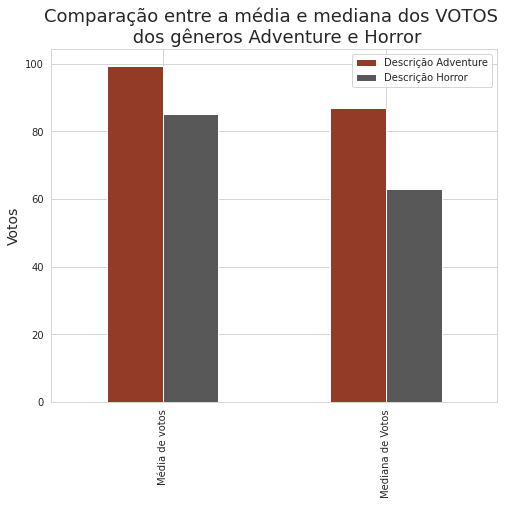

In [54]:
# -- GRAFICO -- 
adv_hor.loc[['Média de votos', 'Mediana de Votos']].plot.bar(figsize = (8,6.5), color=['#933B27', '#585858'])

# --LEGENDA --
plt.title('Comparação entre a média e mediana dos VOTOS \n dos gêneros Adventure e Horror', fontdict={'fontsize':18})
plt.ylabel('Votos',  fontdict={'fontsize':14})
plt.xlabel('')


Text(0.5, 0, ' ')

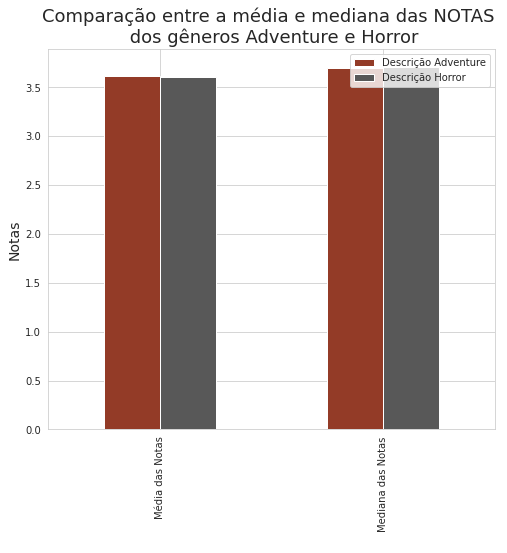

In [55]:
# -- GRAFICO -- 
adv_hor.loc[['Média das Notas', 'Mediana das Notas']].plot.bar(figsize = (8,7), color=['#933B27', '#585858'])

# --LEGENDA --
plt.title('Comparação entre a média e mediana das NOTAS \n dos gêneros Adventure e Horror', fontdict={'fontsize':18})
plt.ylabel('Notas',  fontdict={'fontsize':14})
plt.xlabel(' ')


Text(0.5, 0, ' ')

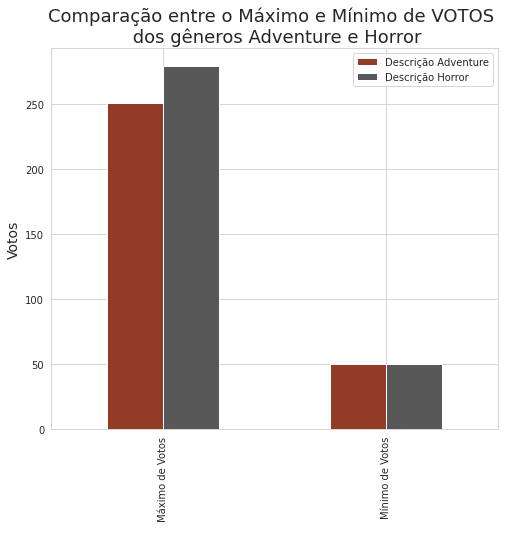

In [56]:
# -- GRAFICO -- 
adv_hor.loc[['Máximo de Votos','Mínimo de Votos']].plot.bar(figsize = (8,7), color=['#933B27', '#585858'])

# --LEGENDA --
plt.title('Comparação entre o Máximo e Mínimo de VOTOS \n dos gêneros Adventure e Horror', fontdict={'fontsize':18})
plt.ylabel('Votos',  fontdict={'fontsize':14})
plt.xlabel(' ')

In [0]:
index0 = ['0']*len(filmes_adventure)
index1 = ['1']*len(filmes_horror)

adv = pd.DataFrame([filmes_adventure_mean,filmes_adventure]).T
hor = pd.DataFrame([filmes_horror_mean,filmes_horror]).T

adv['genero'] = ['Adventure']*len(adv)
hor['genero'] = ['Horror']*len(hor)

adv_hor_scatter = adv.append(hor)

Text(0, 0.5, 'Nota Média')

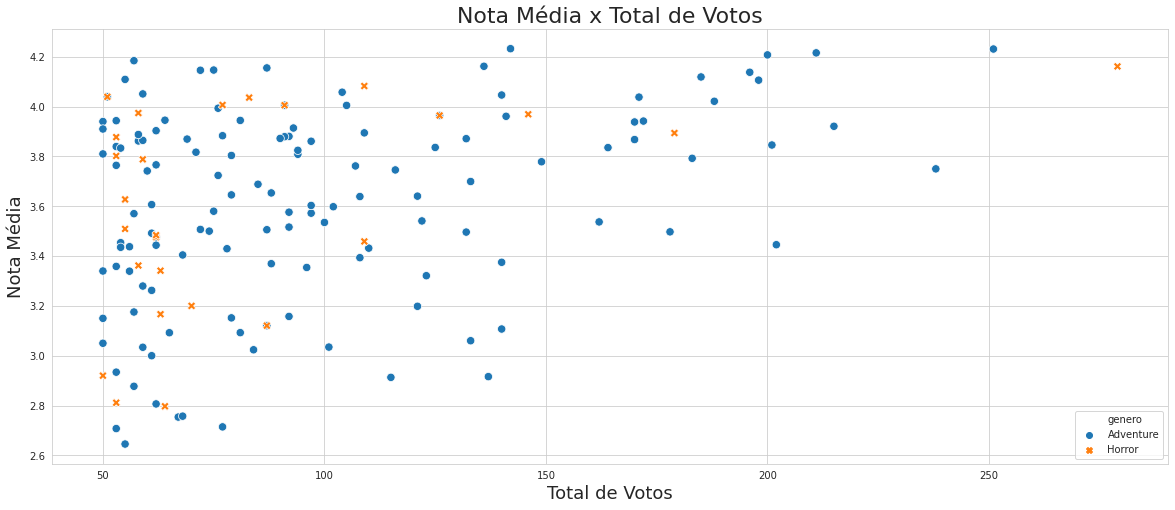

In [58]:
ax = sns.scatterplot(x='total_de_votos',y='nota_media',data=adv_hor_scatter,
                hue='genero', s=70, style ='genero')
ax.figure.set_size_inches(20,8)
ax.set_title('Nota Média x Total de Votos', fontdict={'fontsize':22})
ax.set_xlabel('Total de Votos',fontdict={'fontsize':18})
ax.set_ylabel('Nota Média',fontdict={'fontsize':18})

> Quando comparamos as médias e medianas os dois gêneros são bem parecidos, quase não tendo difereça entre eles. Quando comparamos os votos dos gêneros é possível ver que Horror possui uma nota maxíma maior que Adventure, porém Adventure possui uma média e mediana de votos maior que Horror.

> Ao visualizar o gráfico Total de Votos x Nota Média fica claro que Adventure possui mais filmes que Horror. Ao observar o filme que mais recebeu votos de Horror vemos que ele está isolado, ou seja, ele é uma excessão, os outros filmes estão concentrados entre 50 e 200 votos, enquanto Adventure está concentrado entre 50 e 250.

> Minha sugestão de genêro é Adventure, apesar das médias e medianas serem parecidas com a de horror o genêro possui mais votos.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [59]:
# solução: calculando os 2 generos mais votados

# O DataFrame df_votos já está com os gêneros do mais votado para o menos votado
df_votos.columns[:2]


Index(['Action', 'Drama'], dtype='object')

Os dois gêneros mais votados são Action e Drama

In [0]:
# solução: encontrando os top 5 filmes desses generos

# votos_action e votos_drama são listas que contém apenas os 5 maiores votos de 
# cada gênero
votos_action = sorted((filmes.query('Action == True')['nota_media']), reverse = True)
votos_action = votos_action[0:5]

votos_drama = sorted((filmes.query('Drama == True')['nota_media']), reverse = True)
votos_drama = votos_drama[:5]

In [0]:
filmes['nota_media_arredondado'] = filmes['nota_media'].round(2) # a coluna nota_media_arredondado foi criada para realizar a query

In [62]:

filmes_action = filmes.query('nota_media_arredondado == [4.27, 4.24, 4.23, 4.23, 4.22] & Action == 1 ')
filmes_action = filmes_action.drop(1208) # o filme 1208 foi retirado para ter apenas 5 filmes 
filmes_action = filmes_action.sort_values(by='nota_media', ascending=False)

nome_media_action = {'Filmes (Action)': filmes_action['titulo'],
               'Nota Média': votos_action}
nome_media_action = pd.DataFrame(nome_media_action)
nome_media_action


,Filmes (Action),Nota Média
filmeId,,
2959,Fight Club (1999),4.272936
58559,"Dark Knight, The (2008)",4.238255
1197,"Princess Bride, The (1987)",4.232394
260,Star Wars: Episode IV - A New Hope (1977),4.231076
1196,Star Wars: Episode V - The Empire Strikes Back...,4.219626


In [63]:
filmes_drama = filmes.query('nota_media_arredondado == [4.43, 4.29, 4.27, 4.27, 4.26] & Drama == 1 ')
filmes_drama = filmes_drama.sort_values(by='nota_media', ascending=False)

nome_media_drama = {'Filmes (Drama)': filmes_drama['titulo'],
               'Nota Média': votos_drama}
nome_media_drama = pd.DataFrame(nome_media_drama)
nome_media_drama

,Filmes (Drama),Nota Média
filmeId,,
318,"Shawshank Redemption, The (1994)",4.429022
858,"Godfather, The (1972)",4.289062
2959,Fight Club (1999),4.272936
1276,Cool Hand Luke (1967),4.271930
1221,"Godfather: Part II, The (1974)",4.259690


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

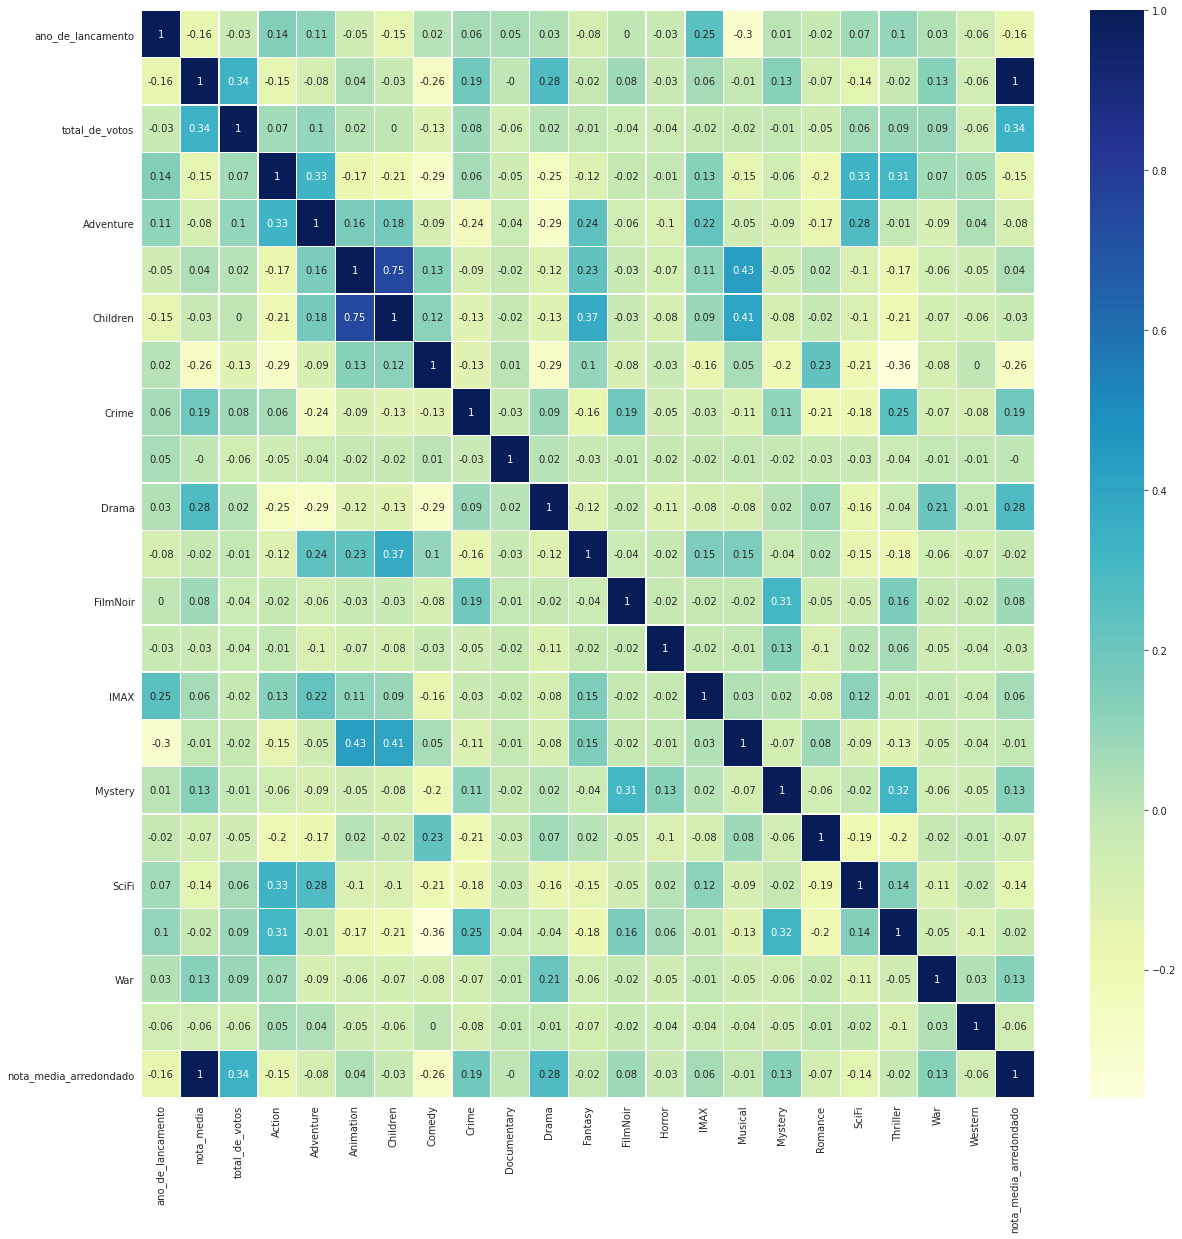

In [64]:
# heatmap criado apenas para ajudar na visualização da matriz correlação

ax = sns.heatmap(filmes.corr().round(2), annot=True, linewidths=.3, cmap="YlGnBu")
ax.figure.set_size_inches(20,20)


In [65]:
filmes.corr()['nota_media'].sort_values()

Comedy                   -0.256005
ano_de_lancamento        -0.159146
Action                   -0.154089
SciFi                    -0.136717
Adventure                -0.079985
Romance                  -0.072002
Western                  -0.059642
Horror                   -0.033877
Children                 -0.030360
Fantasy                  -0.020986
Thriller                 -0.016782
Musical                  -0.008529
Documentary              -0.003486
Animation                 0.043071
IMAX                      0.064931
FilmNoir                  0.081766
War                       0.125615
Mystery                   0.129914
Crime                     0.190220
Drama                     0.277662
total_de_votos            0.342584
nota_media_arredondado    0.999972
nota_media                1.000000
Name: nota_media, dtype: float64

In [66]:
print('Os gêneros com a maior correlação com nota_media são: Drama e Comedy com correlação de 0.278 e -0.255.')
print('Os gêneros com a menor correlação com nota_media são: Documentary e Musical com correlação de -0.003 e -0.009.')

Os gêneros com a maior correlação com nota_media são: Drama e Comedy com correlação de 0.278 e -0.255.
Os gêneros com a menor correlação com nota_media são: Documentary e Musical com correlação de -0.003 e -0.009.


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [67]:
filmes.corr()['total_de_votos'].sort_values()

Comedy                   -0.128527
Western                  -0.060789
Documentary              -0.055010
Romance                  -0.045427
FilmNoir                 -0.039408
Horror                   -0.036132
ano_de_lancamento        -0.028709
Musical                  -0.024741
IMAX                     -0.016285
Fantasy                  -0.009976
Mystery                  -0.007051
Children                  0.001764
Drama                     0.018779
Animation                 0.023442
SciFi                     0.063802
Action                    0.066239
Crime                     0.079766
Thriller                  0.085525
War                       0.087999
Adventure                 0.104380
nota_media                0.342584
nota_media_arredondado    0.342898
total_de_votos            1.000000
Name: total_de_votos, dtype: float64

In [68]:
# solucao
# os dois gêneros com maior correlação com total_de_votos são: Adventure com a correlação de 0.104
# e Comedy com a correlação -0.129

# Os gêneros com a menor correlação são: Children com a correlação de 0.002
# e Mystery com a correlação de -0.007

print('Os gêneros com a maior correlação com total_de_votos são: Adventure e Comedy com correlação de 0.104 e -0.129.')
print('Os gêneros com a menor correlação com total_de_votos são: Children e Mystery com correlação de 0.002 e -0.007.')

Os gêneros com a maior correlação com total_de_votos são: Adventure e Comedy com correlação de 0.104 e -0.129.
Os gêneros com a menor correlação com total_de_votos são: Children e Mystery com correlação de 0.002 e -0.007.


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0, 0.5, 'Nota média')

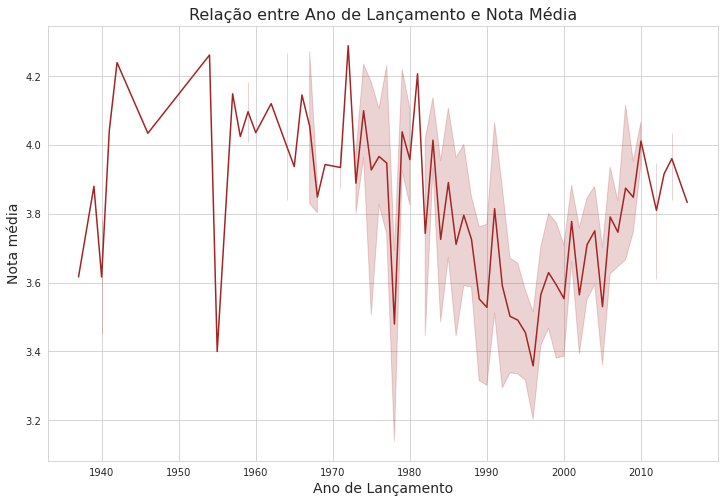

In [69]:
# solucao
# -- GRAFICO -- 
ax = sns.lineplot(y = 'nota_media', x = 'ano_de_lancamento', markers=True, dashes=False, data = filmes, color = "#A22525")

# -- LEGENDA -- 
ax.figure.set_size_inches(12,8)
ax.set_title('Relação entre Ano de Lançamento e Nota Média', fontsize = 16)
ax.set_xlabel('Ano de Lançamento',fontsize = 14)
ax.set_ylabel('Nota média', fontsize = 14)

Text(0, 0.5, 'Nota média')

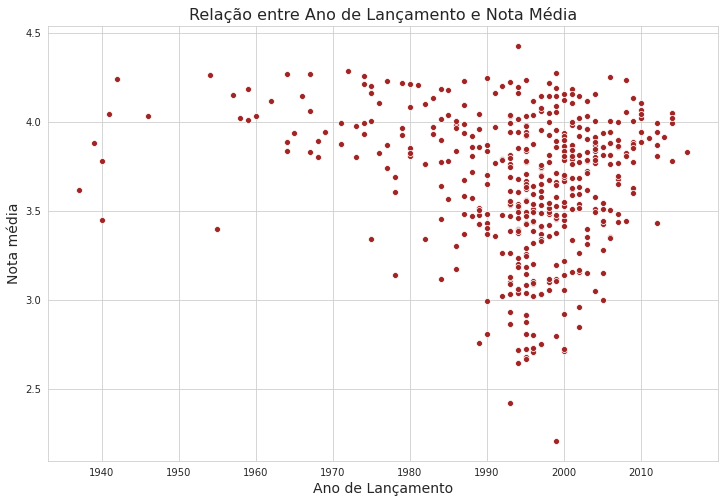

In [70]:
ax = sns.scatterplot(y = 'nota_media', x = 'ano_de_lancamento', data = filmes, color = "#A22525")
ax.figure.set_size_inches(12,8)
ax.set_title('Relação entre Ano de Lançamento e Nota Média', fontsize = 16)
ax.set_xlabel('Ano de Lançamento',fontsize = 14)
ax.set_ylabel('Nota média', fontsize = 14)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [71]:
# solução (código)
corr_ano_media = filmes.corr()['nota_media']['ano_de_lancamento']
corr_ano_media

-0.1591455520444448

### Solução (explicação):
> Os dados ano_de_lancamento e nota_media tem um correlação negativa, quanto mais ano_de_lancamento aumenta mais nota_media diminui, isto pode ser observado no gráfico acima. Um dos motivos que pode ter gerado esse tipo de correlação é que foram dado menos notas ao filmes mais antigos.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.05, 'Pairplot das Variáveis')

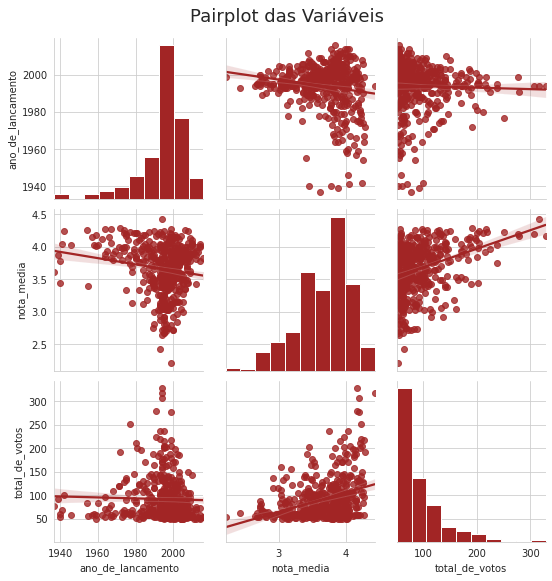

In [72]:
# solução
# -- GRAFICO -- 
infos = ['ano_de_lancamento', 'nota_media', 'total_de_votos']

# --LEGENDA -- 
ax = sns.pairplot(filmes,x_vars=infos, y_vars=infos, kind = 'reg', plot_kws=dict(color='#A22525'),
                  diag_kws=dict(color='#A22525'))
ax.fig.suptitle('Pairplot das Variáveis', fontsize = 18 , y = 1.05)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.09, 'Pairplot dos Gênero Animation')

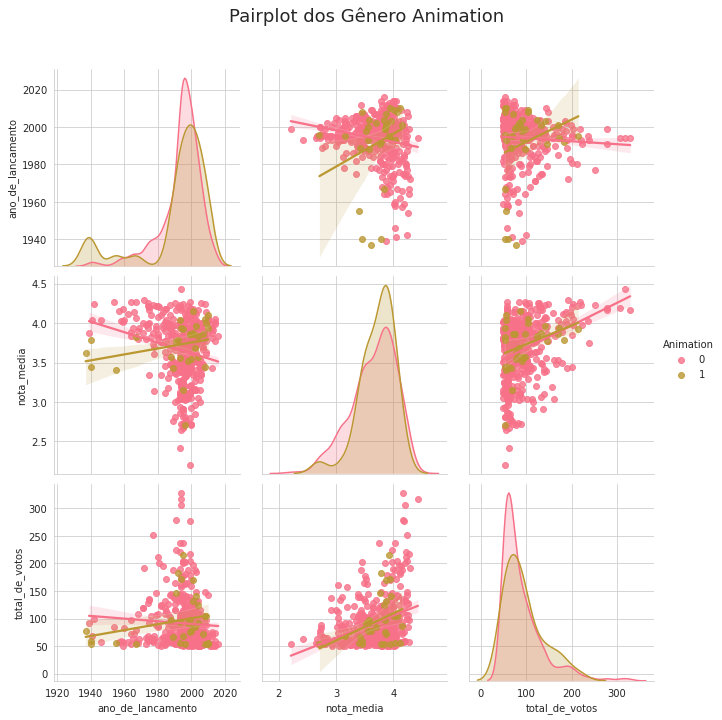

In [73]:
# -- GRAFICO --
sns.set_palette("husl")
ax = sns.pairplot(filmes, y_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'],
                  x_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'], 
                   kind = 'reg',height=3, hue='Animation' )
# -- LEGENDA --
ax.fig.suptitle('Pairplot dos Gênero Animation', fontsize = 18 , y = 1.09)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
-  Plotando apenas o genêro Animation


(1930.0, 2020.0)

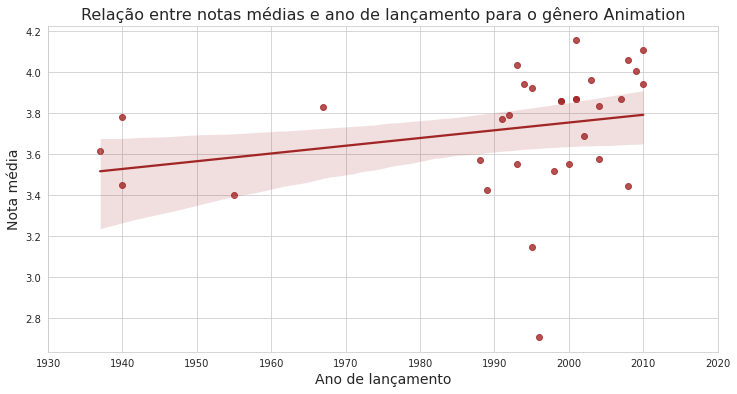

In [74]:
filmes_animation_ax = filmes.query('Animation == 1')[['nota_media','ano_de_lancamento']]

ax = sns.regplot(x='ano_de_lancamento', y=filmes_animation_ax.columns[0],
                 data = filmes_animation_ax,color='#A22525')

ax.figure.set_size_inches(12,6)
ax.set_title('Relação entre notas médias e ano de lançamento para o gênero Animation', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Nota média',fontdict={'fontsize':14})
axes = ax.axes
axes.set_xlim(1930,2020)


(1930.0, 2020.0)

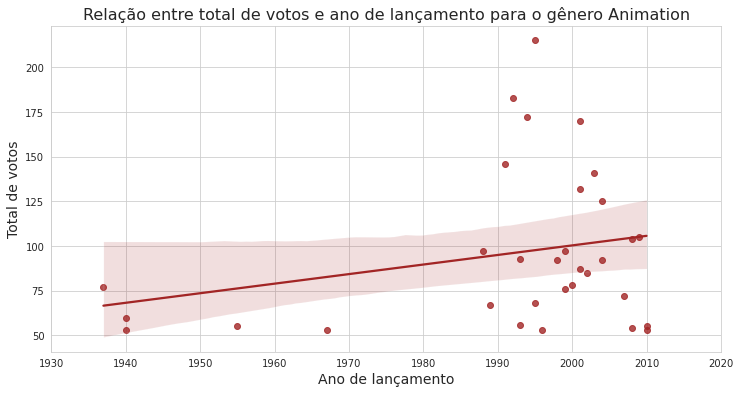

In [75]:
filmes_animation_ax2 = filmes.query('Animation == 1')[['total_de_votos','ano_de_lancamento']]

ax = sns.regplot(x='ano_de_lancamento', y=filmes_animation_ax2.columns[0], 
                 data = filmes_animation_ax2,color='#A22525')

ax.figure.set_size_inches(12,6)
ax.set_title('Relação entre total de votos e ano de lançamento para o gênero Animation', fontdict={'fontsize':16})
ax.set_xlabel('Ano de lançamento',fontdict={'fontsize':14})
ax.set_ylabel('Total de votos',fontdict={'fontsize':14})
axes = ax.axes
axes.set_xlim(1930,2020)

### Respostas
 
 - Correlação ano de lançamento x nota média: O gráfico apresenta uma correlação positiva, sendo assim quanto mais novo o filme maior a nota média. Porém podemos ver que o intervalo de confiança é muito altom, significando que a reta não é uma boa aproximação.  

- Correlação ano de lançamento x total de votos: A correlação entre ano de lançamento e total de votos também é positiva, ou seja, quanto mais novo mais votos o filme obteve, porém percebemos que essa correlação é pequena e o intervalo de confiança também é muito grande, tornando a aproximação não muito boa.

> Ao analisar os gráficos é possível perceber que existem poucos filmes antigos do genêro Animation, assim dificultando a obtenção de resultados mais precisos.

- Correlação nota média x ano de lançamentos e ano de lançamento x total de votos de todos os genêros: É possível perceber que para todos os genêros o comportamento dos gráficos é diferente, os filmes mais novos tendem a receber um nota menor e menos votos, ou seja, nota média e ano de lançamento e ano de lançamento e total de votos apresentam uma correlção negativa para todos os genêros. Porém assim como para Animation a reta não é uma boa aproximação pois o valor residual será muito alto.

- Hipótese :
 > O avanço da tecnologica foi essencial para o desenvolvimento de animações, tendo em vista a maioria das animções feitas hoje são realizadas em computadores. Sendo assim tecnicas de animações estão ligadas a tecnologia e com avanço da tecnologia devemos ter filmes cada vez com mais qualidade tecnica pelo menos.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Os piores e o melhores filme de todos

In [76]:
piores = filmes.sort_values('nota_media', ascending=False).tail()
melhores = filmes.sort_values('nota_media',ascending=False).head()
display(melhores)
display(piores)

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,nota_media_arredondado
filmeId,,,,,,,,,,,,,,,,,,,,,,,,
318,"Shawshank Redemption, The (1994)",1994.0,4.429022,317,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4.43
858,"Godfather, The (1972)",1972.0,4.289062,192,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,4.29
2959,Fight Club (1999),1999.0,4.272936,218,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,4.27
1276,Cool Hand Luke (1967),1967.0,4.271930,57,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4.27
750,Dr. Strangelove or: How I Learned to Stop Worr...,1964.0,4.268041,97,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4.27


,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,nota_media_arredondado
filmeId,,,,,,,,,,,,,,,,,,,,,,,,
172,Johnny Mnemonic (1995),1995.0,2.679245,53,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,2.68
173,Judge Dredd (1995),1995.0,2.669355,62,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2.67
432,City Slickers II: The Legend of Curly's Gold (...,1994.0,2.645455,55,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.65
435,Coneheads (1993),1993.0,2.420635,63,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.42
2701,Wild Wild West (1999),1999.0,2.207547,53,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.21


Text(0.5, 1.0, 'Gêneros que mais vezes aparecem nos melhores filmes')

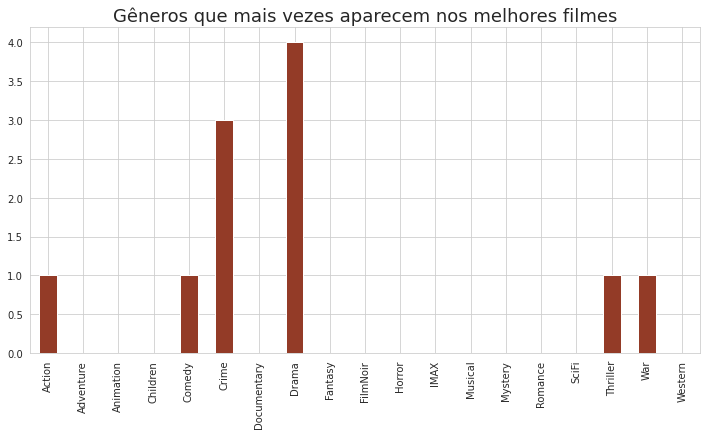

In [84]:
melhores.sum()[4:-1].plot.bar(figsize = (12,6), color=['#933B27'])
plt.title('Gêneros que mais vezes aparecem nos melhores filmes', fontdict={'fontsize':18})


Text(0.5, 1.0, 'Gêneros que mais vezes aparecem nos piores filmes')

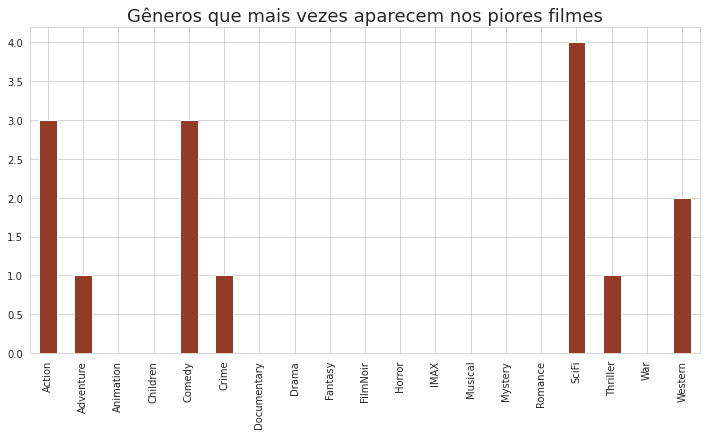

In [85]:
piores.sum()[4:-1].plot.bar(figsize = (12,6), color=['#933B27'])

plt.title('Gêneros que mais vezes aparecem nos piores filmes', fontdict={'fontsize':18})


> Ao analisar os gráficos é possível ver que o gênero que mais aparece nos melhores filmes é Drama que está presente em 4 dos 5 melhores filmes, o segundo gênero que mais aparece é Crime que está em 3. 

> Para os piores filmes o vencedor é SciFi que está em pelo 4 dos 5 filmes seguido de Action e Comedy que estão em 3.

**_Um filme pode conter mais de um genêro por isso a soma dos gêneros não é cinco_**

## Desempenho de Franquias

In [0]:
def localiza_filmes(titulo):
  return filmes.query(f"titulo.str.contains('{titulo}')", engine='python')

In [0]:
# localiza_filmes('')

In [81]:
toy_story = localiza_filmes('Toy Story')
toy_story['franquia'] = 'Toy Story'

bttf = localiza_filmes('Back to the Future')
bttf['franquia'] = 'Back to the Future'

batman = localiza_filmes('Batman')
batman['franquia'] = 'Batman'


harry_potter = localiza_filmes('Harry Potter')
harry_potter['franquia'] = 'Harry Potter'

lord = localiza_filmes('Lord')
lord['franquia'] = 'The Lord of the Rings'

star_wars = localiza_filmes('Star Wars')
star_wars['franquia'] = 'Star Wars'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [0]:
franquias = toy_story.append([bttf,batman,harry_potter,lord,star_wars])


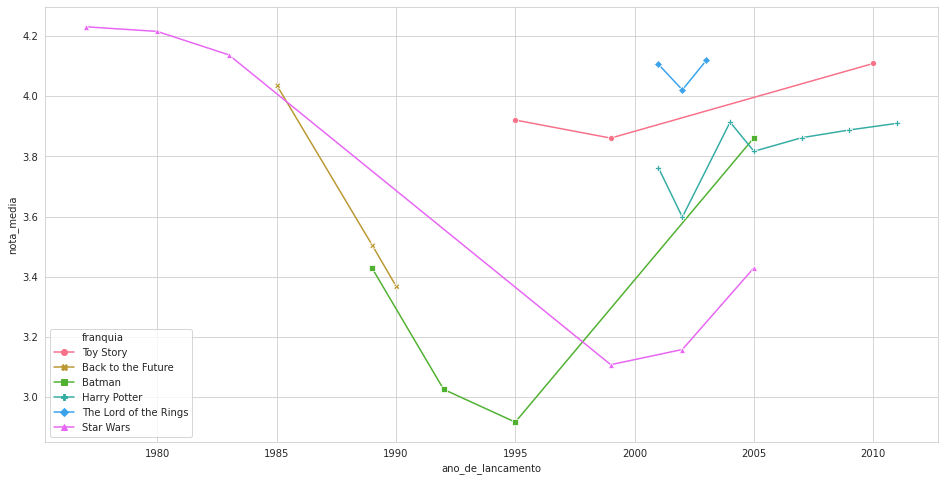

In [83]:
ax = sns.lineplot(x='ano_de_lancamento',y='nota_media',data=franquias,
                  hue = 'franquia',style='franquia',markers=True,dashes=False)

ax.figure.set_size_inches(16,8)

> Podemos perceber que em todas as franquias o segundo filme é sempre pior avaliado que o primeiro, desde de quedas menores como em Star Wars e The Lord of the Rings, até quedas notáveis como em Back to the Future.

> Em Star Wars conseguimos perceber que a segunda triologia tem uma pior avaliação que a primeira.

> O primeiro filme de Back to the Future recebeu uma nota média alta, porém os próximos filmes da franquia não conseguiram manter o padrão de votos do primeiro e obtiveram uma avalição pior.

> Quando analisamos a franquia Batman podemos ver que o filme melhor avaliado foi Batman Begins (2005) que foi dirigido por Christopher Nolan e foi o primeiro da triologia O Cavaleiro das Trevas, depois vem o filme Batman (1989) e Batman Returns (1995) ambos dirigidos por Tim Burtom e o pior avalido é o filme Batman Forever (1995) dirigido por Joel Schumacher. Vale ressaltar que Batman Begins é o primeiro filme de uma triologia e como analisado antes o primeiro filme tende a receber notas mais altas.

